# From Network (NetworkX) to Persistent Homology (PH) 
This notebook expands what is taught in GUDHI Tutorial: https://github.com/GUDHI/TDA-tutorial (part 1 and 2), adding networks.<br>
* 1 - Create 4 samples (toys) networks with NetworkX
* 2 - Calculate the Distance Matrix for these networks
* 3 - From the Distance Matrix, create a Simplicial Complex using Vietoris–Rips complex
* 4 - From the Simplicial Complex, create the Persistent Homology

In [1]:
import numpy as np
import pandas as pd
import gudhi as gd  
import matplotlib.pyplot as plt
from sklearn import manifold
import networkx as nx
from matplotlib.patches import Polygon

# 1 - Create 4 samples (toys) networks with NetworkX

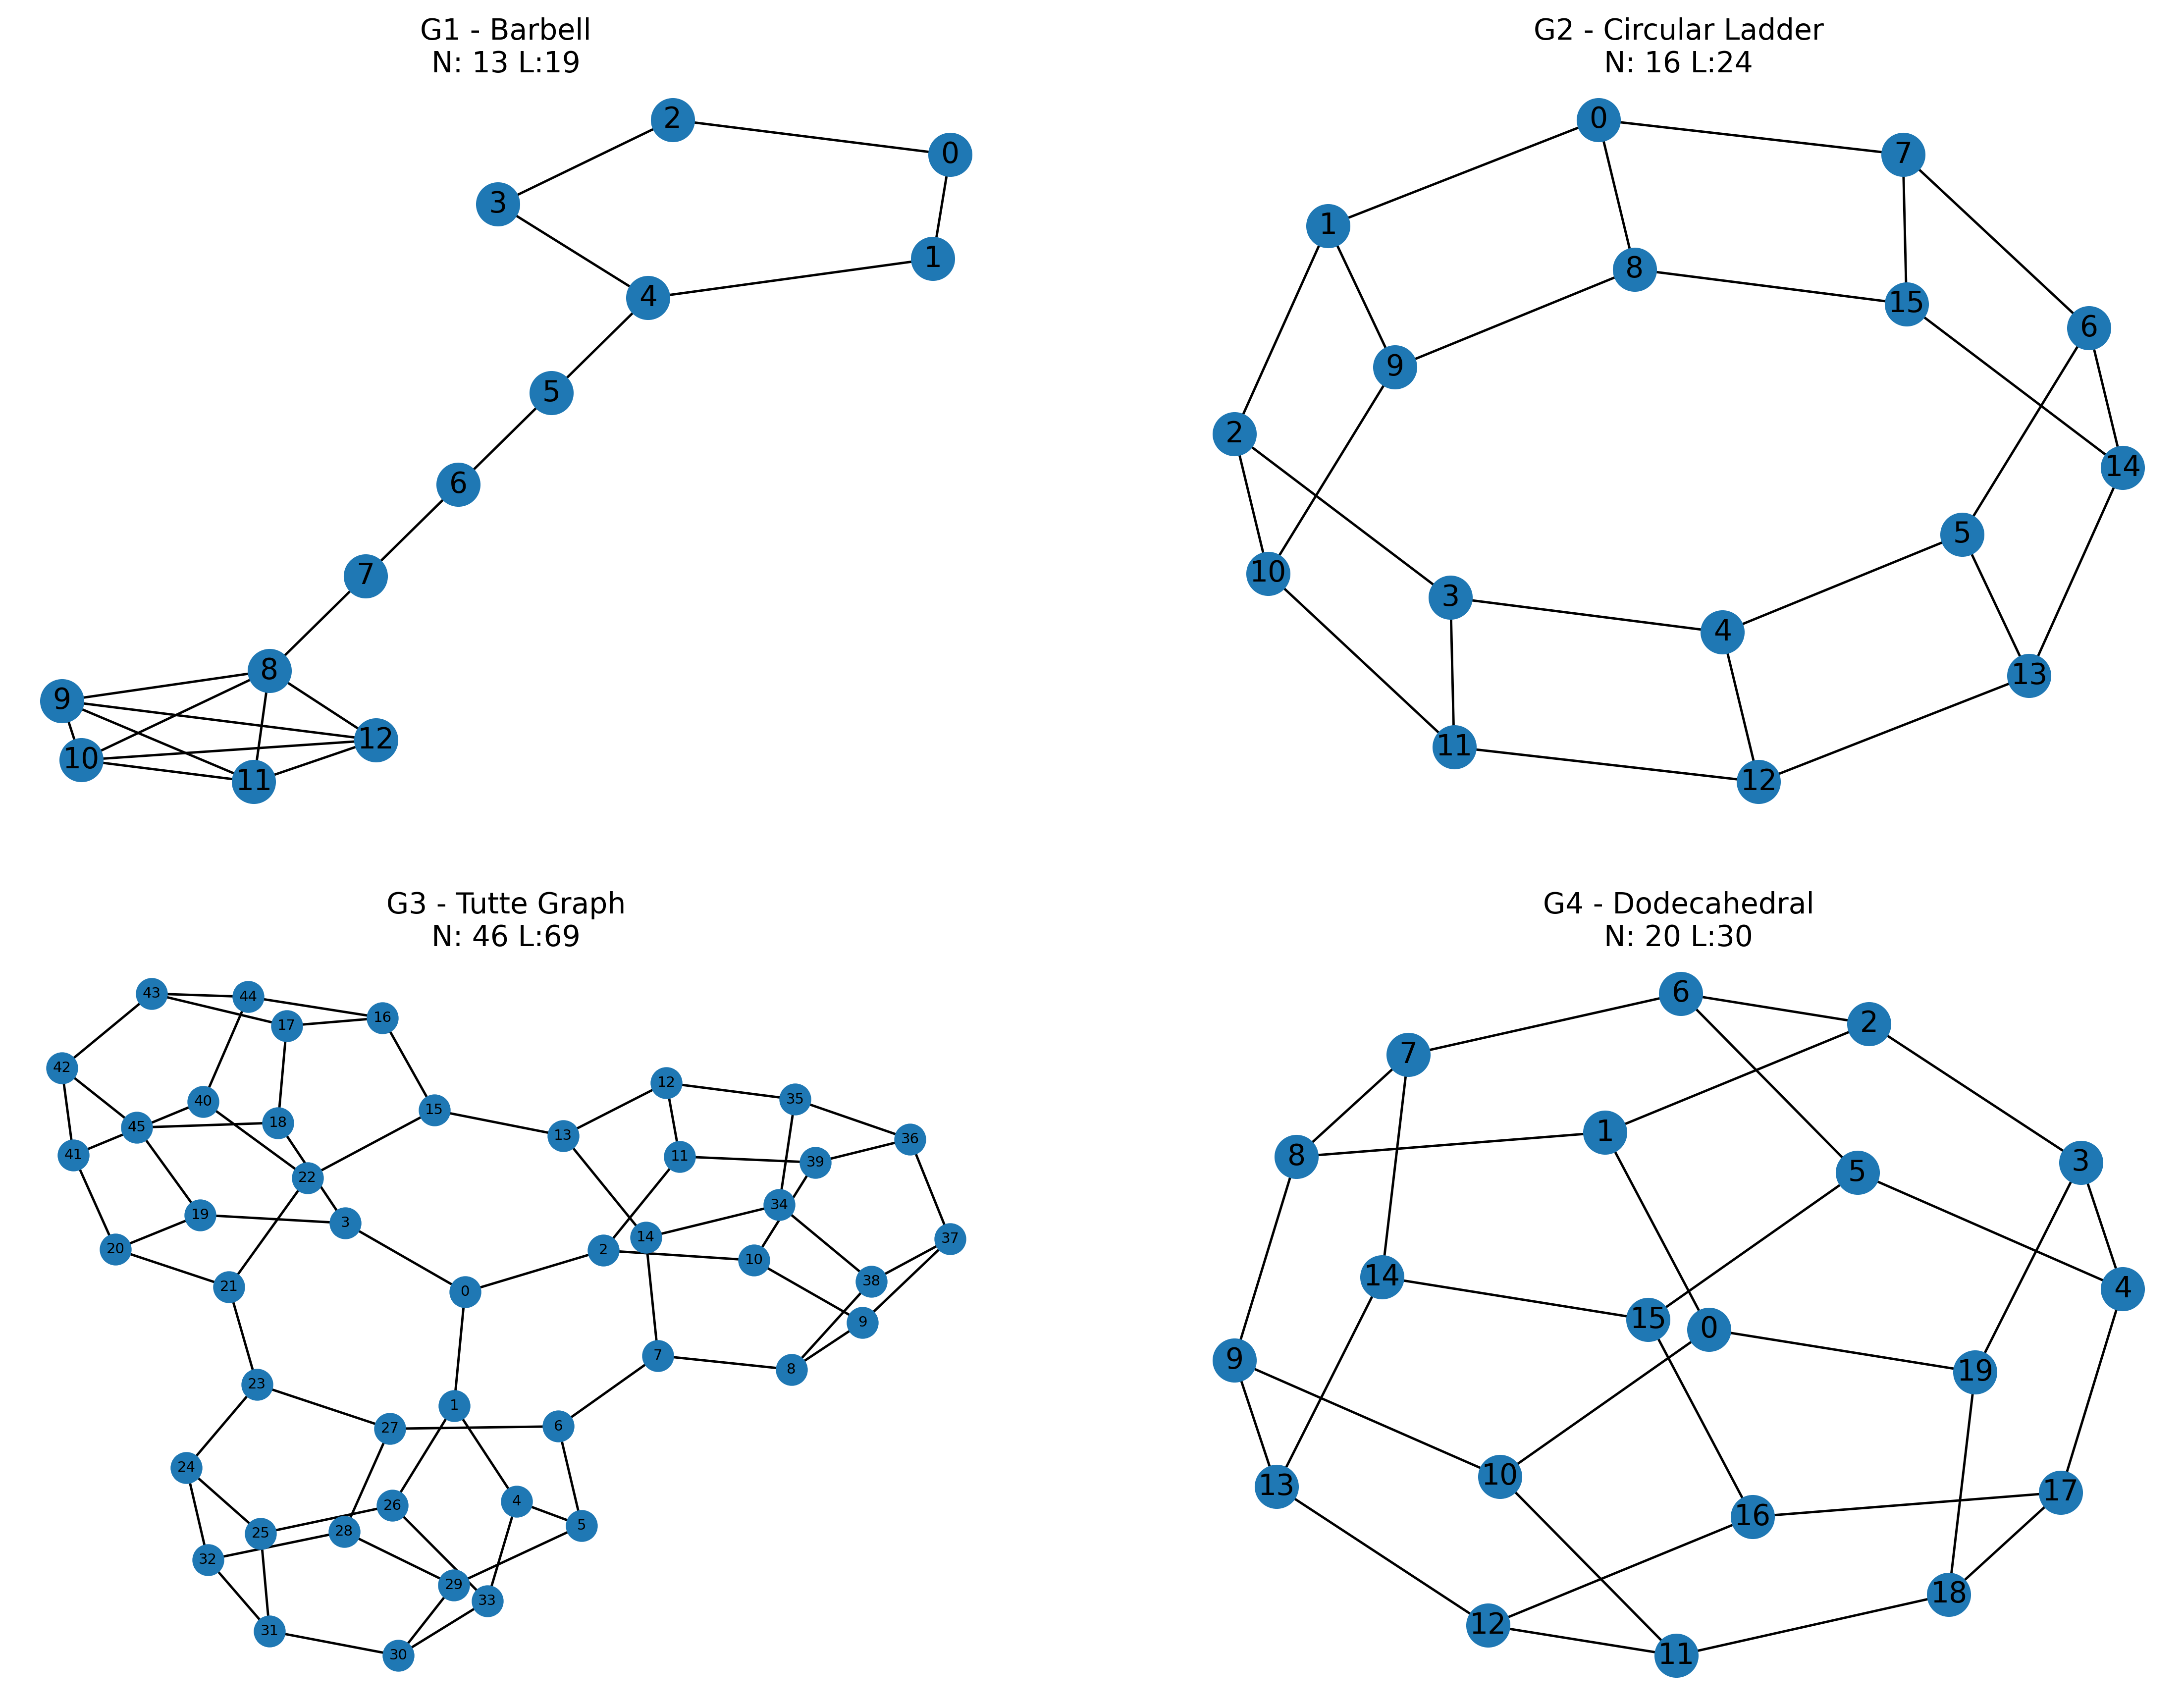

In [2]:
G1 = nx.barbell_graph(5,3)
G1.remove_edges_from([(2,4),(3,1),(1,2),(3,0),(0,4)])
G1.name='G1 - Barbell'
plt.figure(figsize=(16,12),dpi=350)
plt.subplot(2,2,1)
plt.title(G1.name+'\nN: '+str(G1.number_of_nodes())+' L:'+str(G1.number_of_edges()))
nx.draw_kamada_kawai(G1,with_labels=True)

G2 = nx.generators.circular_ladder_graph(8)
G2.name='G2 - Circular Ladder'
plt.subplot(2,2,2)
plt.title(G2.name+'\nN: '+str(G2.number_of_nodes())+' L:'+str(G2.number_of_edges()))
nx.draw_kamada_kawai(G2,with_labels=True)


G3 = nx.tutte_graph()
G3.name='G3 - Tutte Graph'
plt.subplot(2,2,3)
nx.draw_kamada_kawai(G3,with_labels=True,node_size=150,font_size=6)
plt.title(G3.name+'\nN: '+str(G3.number_of_nodes())+' L:'+str(G3.number_of_edges()))

G4 = nx.generators.dodecahedral_graph()
G4.name='G4 - Dodecahedral'
plt.subplot(2,2,4)
nx.draw_kamada_kawai(G4,with_labels=True)
plt.title(G4.name+'\nN: '+str(G4.number_of_nodes())+' L:'+str(G4.number_of_edges()))

plt.show()

# 2 - Calculate the Distance Matrix for these networks

In [3]:
%%time
networks={}
distanceMatrixs={}
for G in [G1,G2,G3,G4]:
    distanceMatrixs[G.name]=pd.DataFrame(dict(nx.shortest_path_length(G))).sort_index()
    networks[G.name]=G

Wall time: 20 ms


# Steps 3 and 4: Simplicial Complex using Vietoris–Rips complex - and - Persistance Homology

usetex mode requires TeX.


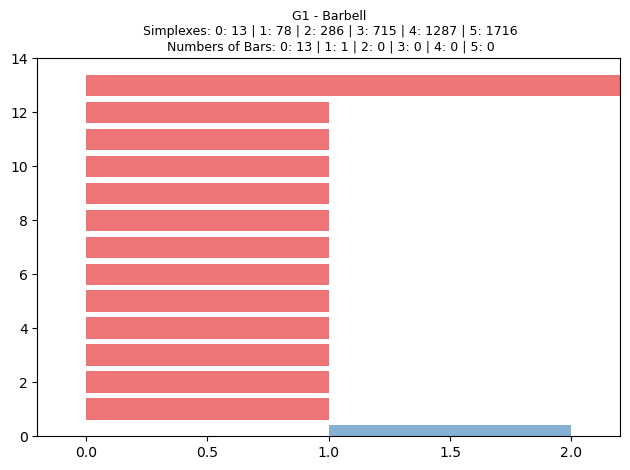

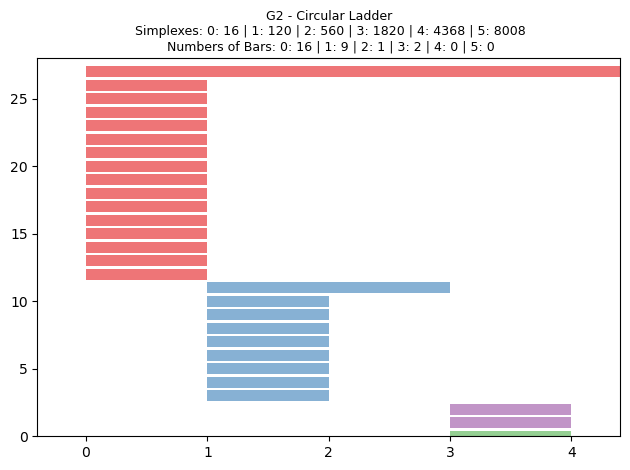

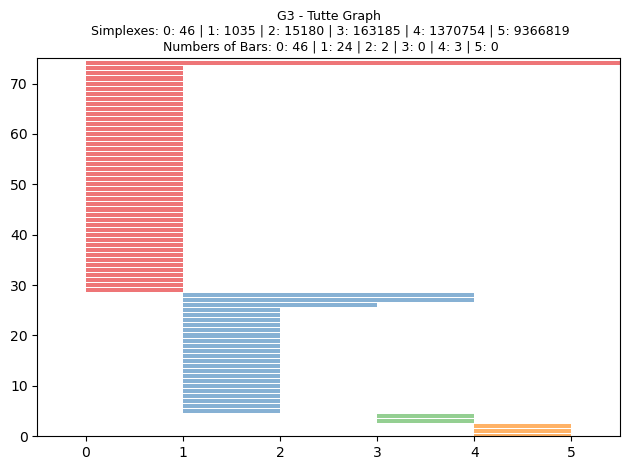

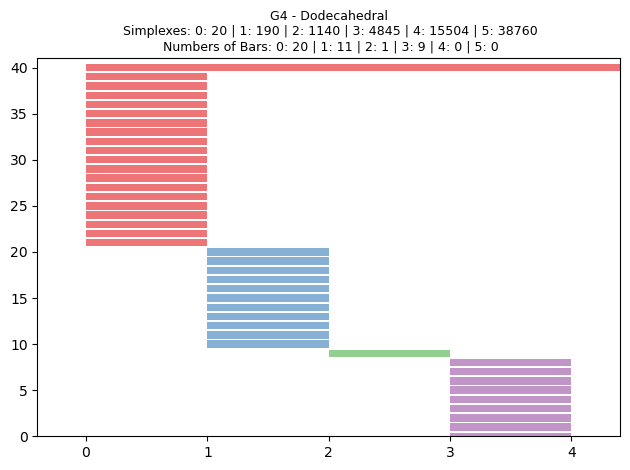

Wall time: 51 s


In [4]:
%%time
dim=5 #max dimension # HUGE impact on time complexity
# %%time with dim = 3: Wall time: 1.18 s
# %%time with dim = 4: Wall time: 3.58 s
# %%time with dim = 5: Wall time: 30.1 s
# The above time does not consider the time used to create the plots and save them on the disk

simplexTrees={}
barCodes={}
for G in [G1,G2,G3,G4]:
    skeleton = gd.RipsComplex(
        distance_matrix = distanceMatrixs[G.name].values
    ) 

    Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = dim)
    simplexTrees[G.name]=Rips_simplex_tree
    
    BarCode = Rips_simplex_tree.persistence()
    barCodes[G.name]=BarCode

    #plt.figure(figsize=(8,16),dpi=350)
    gd.plot_persistence_barcode(BarCode);    
    
    #----Simplexes Resume
    simplexesLen={}
    for simplex,filtration in Rips_simplex_tree.get_filtration():
        if(len(simplex)-1 not in simplexesLen):
            simplexesLen[len(simplex)-1]=1
        else:
            simplexesLen[len(simplex)-1]+=1    

    simplexesResume=''
    for item in simplexesLen.items():
        simplexesResume+=str(item[0])+': '+str(item[1])+' | '
    simplexesResume[0:-3]  
    
    #----Barcode Resume
    
    dimensionsLen={}
    for dim in range(0,dim+1):
        dimensionsLen[dim]=len([bd for bd in BarCode if (bd[0]==dim)])

    dimensionResume=''
    for item in dimensionsLen.items():
        dimensionResume+=str(item[0])+': '+str(item[1])+' | '
    dimensionResume[0:-3]    
            
    #--Plot
    
    plt.title(G.name+'\n Simplexes: '+simplexesResume[0:-3]+'\n Numbers of Bars: '+dimensionResume[0:-3],fontsize=9)
    plt.tight_layout()
    plt.savefig('./imgs/PH - '+G.name+' - Rips',dpi=500)
    plt.show()